In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions
import time
import pandas as pd
import pickle
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image,display,HTML

plt.style.use('ggplot')

In [ ]:
driver=webdriver.Edge(r"C:\Users\berid\python\webdriver\.exe")
data=[]

main_url='https://www.ign.com/reviews/games'
driver.get(main_url)

count_same=0
previous_count=0
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    articles=driver.find_elements(By.CSS_SELECTOR,'div[class="content-item jsx-1409608325 row divider"]')
    print(f'{len(articles)} articles loaded')

    count_same+=1 if previous_count==len(articles) else 0  
    if count_same==5:
        break
    previous_count=len(articles)
        
main_html=driver.page_source
main_soup=BeautifulSoup(main_html,'html.parser')

articles = main_soup.select('div[class="content-item jsx-1409608325 row divider"]')
for article in articles:
    try:
        thumbnail=article.select_one('div[class="item-thumbnail"] img')['src']
        rating=article.select_one('figure[class="review-score hexagon-wrapper jsx-468196757 medium"]')
        game_title=article.select_one('span[class="interface jsx-777404155 item-title bold"]')
        review_date=article.select_one('div[class="interface jsx-153568585 jsx-957202555 item-subtitle small"]')
        description=article.select_one('div[class="interface jsx-153568585 jsx-957202555 item-subtitle small"]')
        review_link='https://www.ign.com'+article.select_one('a[class="item-body"]')['href']

        rating=rating.text if rating else None
        game_title=game_title.text if game_title else None
        review_date=review_date.text.split('-')[0] if review_date else None
        description=description.text.split('-')[-1] if description else None

        driver.get(review_link)
        try:
            verdict = driver.find_element(By.CSS_SELECTOR,'p[class="article jsx-2571790323"]').text
        except:
            verdict=None
        data.append({'Game Title':game_title,'Game Rating':rating,'Thumbnail':thumbnail,'Review Date':review_date,'Description':description,'Review Link':review_link,'Verdict':verdict})
    except:
        pass
    print(game_title)
#pickle.dump(data,open('csv_files/IGN.pickle','wb'))

# Data Preprocessing

In [2]:
data=pickle.load(open('csv_files/IGN.pickle','rb'))
df=pd.DataFrame(data)

In [3]:
df

,Game Title,Game Rating,Thumbnail,Review Date,Description,Review Link,Verdict
0,The Expanse: A Telltale Series Review,7,https://assets-prd.ignimgs.com/2023/08/04/thee...,1d ago,"It may not be expansive, but Telltale’s new g...",https://www.ign.com/articles/the-expanse-a-tel...,The Expanse: A Telltale Series is a solid entr...
1,F1 Manager 2023 Review,8,https://assets-prd.ignimgs.com/2023/07/27/f1re...,8d ago,Frontier's management sim not only avoids the...,https://www.ign.com/articles/f1-manager-2023-r...,F1 Manager 2023 proves that Frontier isn’t one...
2,Disney Illusion Island Review,7,https://assets-prd.ignimgs.com/2023/07/27/disn...,9d ago,Minnie happy returns.,https://www.ign.com/articles/disney-illusion-i...,Disney Illusion Island’s platforming may be ex...
3,Double Dragon Gaiden: Rise of the Dragons Review,7,https://assets-prd.ignimgs.com/2023/07/21/ddri...,9d ago,up with a short wingspan.,https://www.ign.com/articles/double-dragon-gai...,It is very easy to have a good time playing a ...
4,BattleBit Remastered Early Access Review,7,https://assets-prd.ignimgs.com/2023/07/21/batt...,"Jul 21, 2023",edge graphics.,https://www.ign.com/articles/battlebit-remaste...,BattleBit Remastered remembers what made Battl...
...,...,...,...,...,...,...,...
103,Azul Board Game Review,8,https://assets-prd.ignimgs.com/2023/02/07/azul...,"Feb 8, 2023",Deeper than it looks.,https://www.ign.com/articles/azul-board-game-r...,"Between its beautiful presentation, simplicity..."
104,Hogwarts Legacy Review,9,https://assets-prd.ignimgs.com/2023/02/05/hogw...,"Feb 6, 2023","In almost every way, this is the Harry Potter...",https://www.ign.com/articles/hogwarts-legacy-r...,"In nearly every way, Hogwarts Legacy is the Ha..."
105,Hi-Fi Rush Review,9,https://assets-prd.ignimgs.com/2023/02/02/hifi...,"Feb 3, 2023",action that marches to the beat of its own drum.,https://www.ign.com/articles/hi-fi-rush-review,I swear Hi-Fi Rush could be a premier cartoon ...
106,Skyrim the Board Game Review,6,https://assets-prd.ignimgs.com/2023/01/30/unti...,"Jan 31, 2023",quests.,https://www.ign.com/articles/elder-scrolls-v-s...,The quest system is delightful and somewhat ad...


In [4]:
today=pd.to_datetime(datetime.date.today().strftime("%Y-%m-%d %H:%M:%S"))

df['Review Date']=df['Review Date'].apply(lambda x:
                        today-datetime.timedelta(days=int(x.split('d ago')[0])) if 'ago' in x else 
                        pd.to_datetime(x))

In [5]:
df['Game Rating']=df['Game Rating'].apply(lambda x:int(x) if x else None)

In [6]:
df

,Game Title,Game Rating,Thumbnail,Review Date,Description,Review Link,Verdict
0,The Expanse: A Telltale Series Review,7,https://assets-prd.ignimgs.com/2023/08/04/thee...,2023-08-05,"It may not be expansive, but Telltale’s new g...",https://www.ign.com/articles/the-expanse-a-tel...,The Expanse: A Telltale Series is a solid entr...
1,F1 Manager 2023 Review,8,https://assets-prd.ignimgs.com/2023/07/27/f1re...,2023-07-29,Frontier's management sim not only avoids the...,https://www.ign.com/articles/f1-manager-2023-r...,F1 Manager 2023 proves that Frontier isn’t one...
2,Disney Illusion Island Review,7,https://assets-prd.ignimgs.com/2023/07/27/disn...,2023-07-28,Minnie happy returns.,https://www.ign.com/articles/disney-illusion-i...,Disney Illusion Island’s platforming may be ex...
3,Double Dragon Gaiden: Rise of the Dragons Review,7,https://assets-prd.ignimgs.com/2023/07/21/ddri...,2023-07-28,up with a short wingspan.,https://www.ign.com/articles/double-dragon-gai...,It is very easy to have a good time playing a ...
4,BattleBit Remastered Early Access Review,7,https://assets-prd.ignimgs.com/2023/07/21/batt...,2023-07-21,edge graphics.,https://www.ign.com/articles/battlebit-remaste...,BattleBit Remastered remembers what made Battl...
...,...,...,...,...,...,...,...
103,Azul Board Game Review,8,https://assets-prd.ignimgs.com/2023/02/07/azul...,2023-02-08,Deeper than it looks.,https://www.ign.com/articles/azul-board-game-r...,"Between its beautiful presentation, simplicity..."
104,Hogwarts Legacy Review,9,https://assets-prd.ignimgs.com/2023/02/05/hogw...,2023-02-06,"In almost every way, this is the Harry Potter...",https://www.ign.com/articles/hogwarts-legacy-r...,"In nearly every way, Hogwarts Legacy is the Ha..."
105,Hi-Fi Rush Review,9,https://assets-prd.ignimgs.com/2023/02/02/hifi...,2023-02-03,action that marches to the beat of its own drum.,https://www.ign.com/articles/hi-fi-rush-review,I swear Hi-Fi Rush could be a premier cartoon ...
106,Skyrim the Board Game Review,6,https://assets-prd.ignimgs.com/2023/01/30/unti...,2023-01-31,quests.,https://www.ign.com/articles/elder-scrolls-v-s...,The quest system is delightful and somewhat ad...


# Sentiment Analysis

In [7]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [8]:
def verdict_sentiment_scores(verdict):
    verdict_tokenized=nltk.word_tokenize(verdict)
    verdict_lower=[w.lower() for w in verdict_tokenized]
    verdict_lemmatized=[lemmatizer.lemmatize(w) for w in verdict_lower]
    verdict_filtered=[w for w in verdict_lemmatized if w not in stopwords]
    final_verdict=' '.join(verdict_filtered)
    
    score=sia.polarity_scores(final_verdict)['compound']
    return score

In [9]:
scores = []

for i,verdict in enumerate(df['Verdict']):
    if isinstance(verdict, str):
        scores.append(verdict_sentiment_scores(verdict))
    else:
        scores.append(None)

In [10]:
df['Sentiment Score']=scores

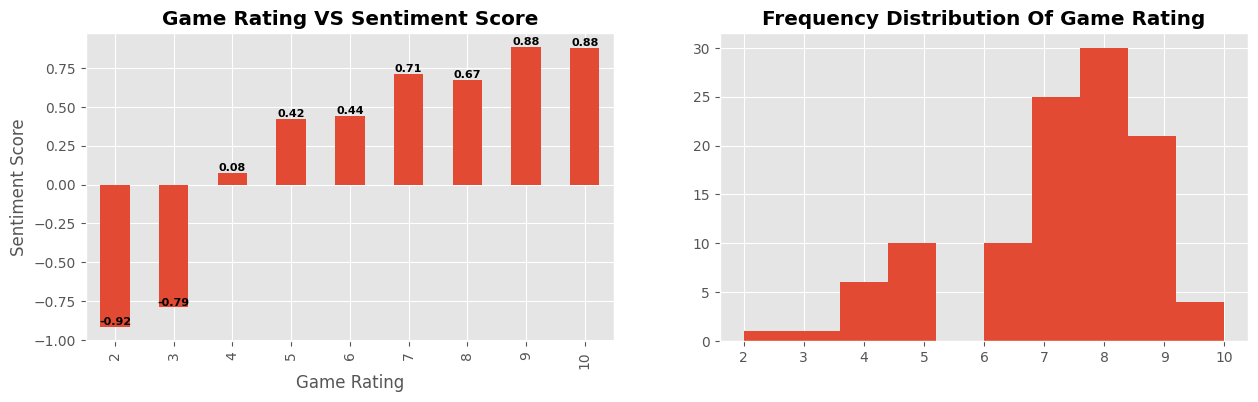

In [11]:
g=df.groupby(['Game Rating'])['Sentiment Score'].mean()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
g.plot.bar(ax=ax1)
ax1.set_title('Game Rating VS Sentiment Score',fontweight='bold')
ax1.set_ylabel('Sentiment Score')
for i in range(len(g)):
    ax1.text(i,g.values[i],g.values[i].round(2),fontweight='bold',size=8,horizontalalignment='center',verticalalignment='bottom')
    
df['Game Rating'].hist(bins=10,ax=ax2)
ax2.set_title('Frequency Distribution Of Game Rating',fontweight='bold')

plt.show()

In [12]:
top=df.sort_values('Sentiment Score',ascending=False)[['Game Title','Thumbnail','Game Rating','Sentiment Score']].reset_index(drop=True)
top['Thumbnail']=top['Thumbnail'].apply(lambda x:f'<img src="{x}" width="150">')
display(HTML(top.to_html(escape=False)))

#games sorted by sentiment score from best to worst

,Game Title,Thumbnail,Game Rating,Sentiment Score
0,Pizza Tower Review,,9,0.9930
1,Bayonetta Origins Review,,9,0.9929
2,Harvest Moon Remake Review,,6,0.9913
3,7 Wonders Board Game Review (2023),,7,0.9906
4,Sons of the Forest Early Access Review,,8,0.9904
5,Star Trek Resurgence Review,,7,0.9900
6,Trepang2 Review,,8,0.9892
7,MLB The Show 23 Review,,9,0.9882
8,Demeo Review - PS VR2,,8,0.9871
9,Aliens: Dark Descent Review,,7,0.9871
